# Machine Learning Project 1 - Seoul Bike Sharing Demand
## Antonije Petrović 1253, January 2021

Dataset: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [101]:
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")
data = pd.read_csv('SeoulBikeData.csv',
                   parse_dates=['Date'],
                   date_parser=custom_date_parser,encoding= 'unicode_escape')

In [102]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [103]:
#check statistics:
data.describe(include = 'all', datetime_is_numeric=True)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,2018-05-31 23:59:59.999992064,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,NaN,NaN,NaN


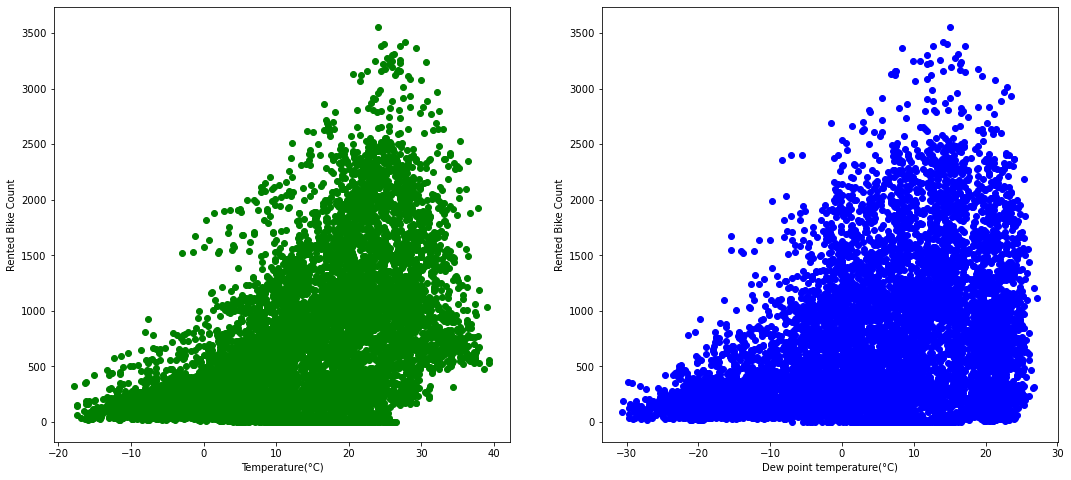

In [104]:
fig = plt.figure(figsize=(18, 8))

fig.add_subplot(1, 2, 1)
plt.scatter(data['Temperature(°C)'], data['Rented Bike Count'], marker='o', color='g')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')

fig.add_subplot(1, 2, 2)
plt.scatter(data['Dew point temperature(°C)'], data['Rented Bike Count'], marker='o', color='b')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')

plt.show()

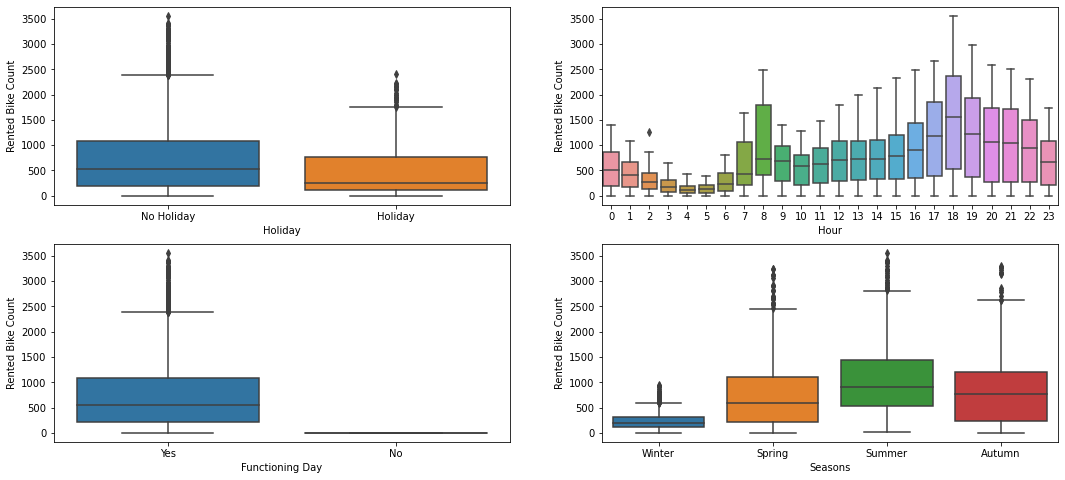

In [105]:
f,ax=plt.subplots(2, 2, figsize=(18,8))
sb.boxplot(data=data,x="Holiday", y="Rented Bike Count", ax = ax[0,0])
sb.boxplot(data=data,x=data["Hour"], y="Rented Bike Count", ax = ax[0,1])
sb.boxplot(data=data,x="Functioning Day", y="Rented Bike Count", ax = ax[1,0])
sb.boxplot(data=data,x="Seasons", y="Rented Bike Count", ax = ax[1,1])
plt.show()

In [115]:
#result_df = data.loc[data['Hour'] == 2]
result_df = data.loc[data['Rented Bike Count'] > 800]
result_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date Hour
8,2017-12-01,930,0 days 08:00:00,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 08:00:00
18,2017-12-01,862,0 days 18:00:00,0.6,66,1.4,2000,-5.0,0.00,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 18:00:00
80,2017-12-04,937,0 days 08:00:00,-0.8,69,3.5,954,-5.7,0.01,0.0,0.0,Winter,No Holiday,Yes,2017-12-04 08:00:00
90,2017-12-04,807,0 days 18:00:00,-2.1,29,3.9,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017-12-04 18:00:00
104,2017-12-05,812,0 days 08:00:00,-8.1,36,1.6,2000,-20.5,0.01,0.0,0.0,Winter,No Holiday,Yes,2017-12-05 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745,2018-11-30,809,0 days 09:00:00,-0.4,57,0.6,1270,-7.8,0.45,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 09:00:00
8752,2018-11-30,837,0 days 16:00:00,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 16:00:00
8753,2018-11-30,1047,0 days 17:00:00,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 17:00:00
8754,2018-11-30,1384,0 days 18:00:00,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 18:00:00


In [114]:
data['Hour'] = pd.to_timedelta(data['Hour'], unit = 'h')
data['Date Hour'] = data['Date']+data['Hour']
data.set_index(['Date Hour'], drop=False)
data.iloc[4920]

Date                         2018-06-24 00:00:00
Rented Bike Count                            849
Hour                             0 days 00:00:00
Temperature(°C)                               22
Humidity(%)                                   81
Wind speed (m/s)                             1.6
Visibility (10m)                             374
Dew point temperature(°C)                   18.5
Solar Radiation (MJ/m2)                        0
Rainfall(mm)                                   0
Snowfall (cm)                                  0
Seasons                                   Summer
Holiday                               No Holiday
Functioning Day                              Yes
Date Hour                    2018-06-24 00:00:00
Name: 4920, dtype: object